# OptiCoffee

El Área de Producción de **OptiCoffee** lo ha contactado para realizar la **planeación de la producción de toneladas de café para los próximos 'n' meses**. El Área de Producción debe decidir **cuántas toneladas de café producir mensualmente** con el fin de **satisfacer la demanda al final de cada mes**.

Actualmente, OptiCoffee cuenta con un **inventario de 'n' toneladas** de café almacenadas en su bodega. Al final de cada mes, el café que no haya sido utilizado debe ser **almacenado en inventario** y puede ser utilizado para satisfacer la demanda de los siguientes meses.

La **Tabla 1** presenta los **costos mensuales de producción y almacenamiento** de una tonelada de café, así como la **demanda mensual** de toneladas de café que tiene que satisfacer OptiCoffee. Es importante tener en cuenta que los **costos y la demanda varían dependiendo del mes**, estos son a modo de ejemplo.

Naturalmente, el Área de Producción de OptiCoffee desea **minimizar sus costos totales a lo largo del horizonte de planeación** (i.e., 12 meses).



**Tabla 1.** Costos mensuales de producción y almacenamiento de una tonelada de café y demanda mensual

| Mes                                               | 1   | 2   | 3   | 4   | 5   | 6   | 7   | 8   | 9   | 10  | 11  | 12  |
| ------------------------------------------------- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- |
| **Costo de producción** (millones de COP/Ton)     | 5   | 5   | 5   | 10  | 6   | 10  | 9   | 9   | 6   | 10  | 7   | 8   |
| **Costo de almacenamiento** (millones de COP/Ton) | 5   | 4   | 4   | 5   | 3   | 1   | 3   | 5   | 3   | 3   | 4   | 5   |
| **Demanda** (Ton)                                 | 522 | 554 | 557 | 519 | 476 | 475 | 462 | 452 | 465 | 422 | 512 | 596 |



**Objetivo**

Para planear la producción de OptiCoffee, usted desarrollará un **modelo de optimización**.

## Datos

In [1]:
"""
===============================================================================
Preparación del entorno de planeación de inventarios para experimentación
──────────────────────────────────────────────────────────────────────────────
Este script crea una instancia sintética de un problema de inventarios de
múltiples períodos a partir de un generador externo (`InsInventory.py`) ubicado
en un directorio de instancias personalizado. El objetivo es disponer de datos
estructurados (demanda por período, etc.) sobre los cuales se puedan aplicar
posteriormente políticas de reabastecimiento, simulaciones, heurísticas o
modelos de optimización.

Estructura general
-------------------------------------------------------------------------------
  1. Importar librerías requeridas.
  2. Ajustar la ruta de búsqueda de módulos para acceder a instancias externas.
  3. Generar datos sintéticos de demanda para un horizonte de planificación
     definido por número de períodos.
  4. Calcular un inventario inicial (I_0) como fracción conservadora de la
     demanda mínima observada en el horizonte.
  5. Inspeccionar / visualizar los datos generados.
  6. Inicializar contenedor para registrar resultados de algoritmos.
===============================================================================
"""

# ============================================================================
# 1. IMPORTACIÓN DE LIBRERÍAS
# ============================================================================
import time                       # medición de tiempos de ejecución (uso futuro)

import sys                        # manipulación del path de importación
import os                         # utilidades de sistema de archivos

# ============================================================================
# 2. CONFIGURACIÓN DEL PATH PARA ACCESO A INSTANCIAS EXTERNAS
# ============================================================================
# Agrega la carpeta '../Instances' (relativa a este script/notebook) al sys.path
# para que Python pueda encontrar y cargar el generador de datos de inventarios.
sys.path.append(os.path.abspath("../Instances"))

# ============================================================================
# 3. IMPORTAR GENERADOR DE DATOS DE INVENTARIO
# ============================================================================
# `generar_datos` crea una instancia sintética con variables por período (p.ej.,
# demanda d_t). El parámetro `num_periodos` define la longitud del horizonte.
from InsInventory import generar_datos, plot_plan_produccion

# ============================================================================
# 4. CREAR ENTORNO / INSTANCIA SINTÉTICA DE PLANEACIÓN
# ============================================================================
# Definir la longitud del horizonte de planeación (número de períodos, p.ej. meses).
horizonte_planeacion = generar_datos(num_periodos=12*5)

# ============================================================================
# 5. ESTABLECER INVENTARIO INICIAL
# ============================================================================
# Como punto de partida sencillo, fijamos el inventario inicial (I_0) como 25%
# de la demanda mínima observada a lo largo del horizonte. Se aplica `int()` para
# trabajar con inventarios enteros (redondeo hacia abajo).
I_0 = int(min(horizonte_planeacion['d_t']) * 0.25)

# ============================================================================
# 6. ESTRUCTURA PARA REGISTRAR RESULTADOS
# ============================================================================
# Se usará para acumular métricas de distintos enfoques (heurísticas, políticas,
# modelos de optimización, simulaciones Monte Carlo, etc.) aplicados al horizonte.
resultados = []

# Mostrar el DataFrame / estructura generada para inspección en entornos
# interactivos (Jupyter, IPython). En un script puro, esto no imprime nada a
# menos que se envuelva en `print(...)`.
horizonte_planeacion

,t,Mes,c_t,h_t,d_t,Clasif_c,Clasif_h,Demanda_rel
t,,,,,,,,
1,1,M1,5.39,2.88,7,Barato,Barato,Alta
2,2,M2,9.86,5.25,5,Caro,Caro,Media
3,3,M3,11.88,5.59,4,Caro,Caro,Baja
4,4,M4,5.93,4.84,5,Barato,Medio,Media
5,5,M5,6.22,3.25,6,Medio,Medio,Alta
6,6,M6,6.82,4.93,6,Medio,Medio,Alta
7,7,M7,5.82,4.52,4,Barato,Medio,Baja
8,8,M8,4.55,3.52,4,Barato,Medio,Baja
9,9,M9,4.35,4.32,5,Barato,Medio,Media


## Optimización (MIP)

### Formulación

#### Conjuntos

$$
M \quad \text{: Conjunto de meses}
$$

#### Parámetros

$$
c_t \quad \text{: Costo de producir una tonelada de café en el mes } t \in M
$$

$$
h_t \quad \text{: Costo de almacenar una tonelada de café en el mes } t \in M
$$

$$
d_t \quad \text{: Demanda de café en el mes } t \in M
$$

$$
I^0 \quad \text{: Inventario inicial (toneladas)}
$$


#### Variables de decisión

$$
x_t \quad \text{: Toneladas de café a producir en el mes } t \in M
$$

$$
I_t \quad \text{: Inventario de toneladas de café al final del mes } t \in M
$$


#### Modelo en Palabras

**Minimizar:**

> Costos de producción + Costos de almacenamiento

**Sujeto a:**

* Modelar el inventario para el primer mes
* Modelar el inventario para los demás meses
* Naturaleza de las variables

#### Modelo Matemático

Minimizar:

$$
\sum_{t \in M} (c_t x_t + h_t I_t) \tag{1}
$$

Sujeto a:

Inventario en el primer mes:

$$
I_1 = I^0 + x_1 - d_1 \tag{2}
$$

Inventario para los meses siguientes:

$$
I_t = I_{t-1} + x_t - d_t, \quad \forall t \in M \mid t > 1 \tag{3}
$$

Naturaleza de las variables:

$$
x_t, I_t \geq 0, \quad \forall t \in M \tag{4}
$$

#### Notas

* (1) minimiza los costos de producción más los costos de almacenamiento.
* (2) modela el inventario para el primer mes.
* (3) modela el inventario para los demás meses.
* (4) describe la naturaleza de las variables.


In [2]:
# ============================================================================
# Extraer parámetros de la instancia de inventario a estructuras Python simples
# ============================================================================
# M: períodos del horizonte (índices del DataFrame)
M = list(horizonte_planeacion.index)

# c_t: costo de compra/producción por período
c = dict(horizonte_planeacion['c_t'].squeeze())

# h_t: costo de mantenimiento (holding) por período
h = dict(horizonte_planeacion['h_t'].squeeze())

# d_t: demanda esperada por período
d = dict(horizonte_planeacion['d_t'].squeeze())


### Modelo

In [3]:
import pulp as lp

def optimizacion_inventario(M, c, h, d, I_0=0):
    """
    Modelo de inventario multiperíodo (minimización de costo total).
    Params:
        M   : lista de períodos (índices, se asume 1 incluido).
        c   : dict[t] costo de compra/producción en t.
        h   : dict[t] costo de mantener inventario al final de t.
        d   : dict[t] demanda en t.
        I_0 : inventario inicial previo al período 1.
    Returns:
        model : modelo PuLP resuelto.
        x     : vars de orden/producción por período.
        I     : vars de inventario final por período.
    """
    # Crear modelo
    model = lp.LpProblem("OptiCoffi", lp.LpMinimize)

    # Variables: decisiones de pedido y nivel de inventario
    x = {t: lp.LpVariable(f'x_{t}', lowBound=0, cat=lp.LpInteger) for t in M}
    I = {t: lp.LpVariable(f'I_{t}', lowBound=0, cat=lp.LpInteger) for t in M}
    
    # Objetivo: costo compra + costo mantenimiento
    model += lp.lpSum(c[t] * x[t] + h[t] * I[t] for t in M)

    # Balance inventario
    for t in M:
        if t == 1:
            model += I[1] == I_0 + x[1] - d[1]  # usa inventario inicial
        else:
            model += I[t] == I[t-1] + x[t] - d[t]
    
    # Resolver
    solver = lp.getSolver('PULP_CBC_CMD', msg=False)
    model.solve(solver)

    # Estado del solver
    print(f'El optimizador llegó a una solución: {lp.LpStatus[model.status]}.')

    return model, x, I


El optimizador llegó a una solución: Optimal.

Tiempo de ejecución: 0.035251 s
FO (valor total): 1785.58 (Producción) + 111.52 (Inventario) = 1897.1
Cantidad de toneladas pedidas (valor total): 294.0.
Cantidad de toneladas en inventario (valor total): 52.0.


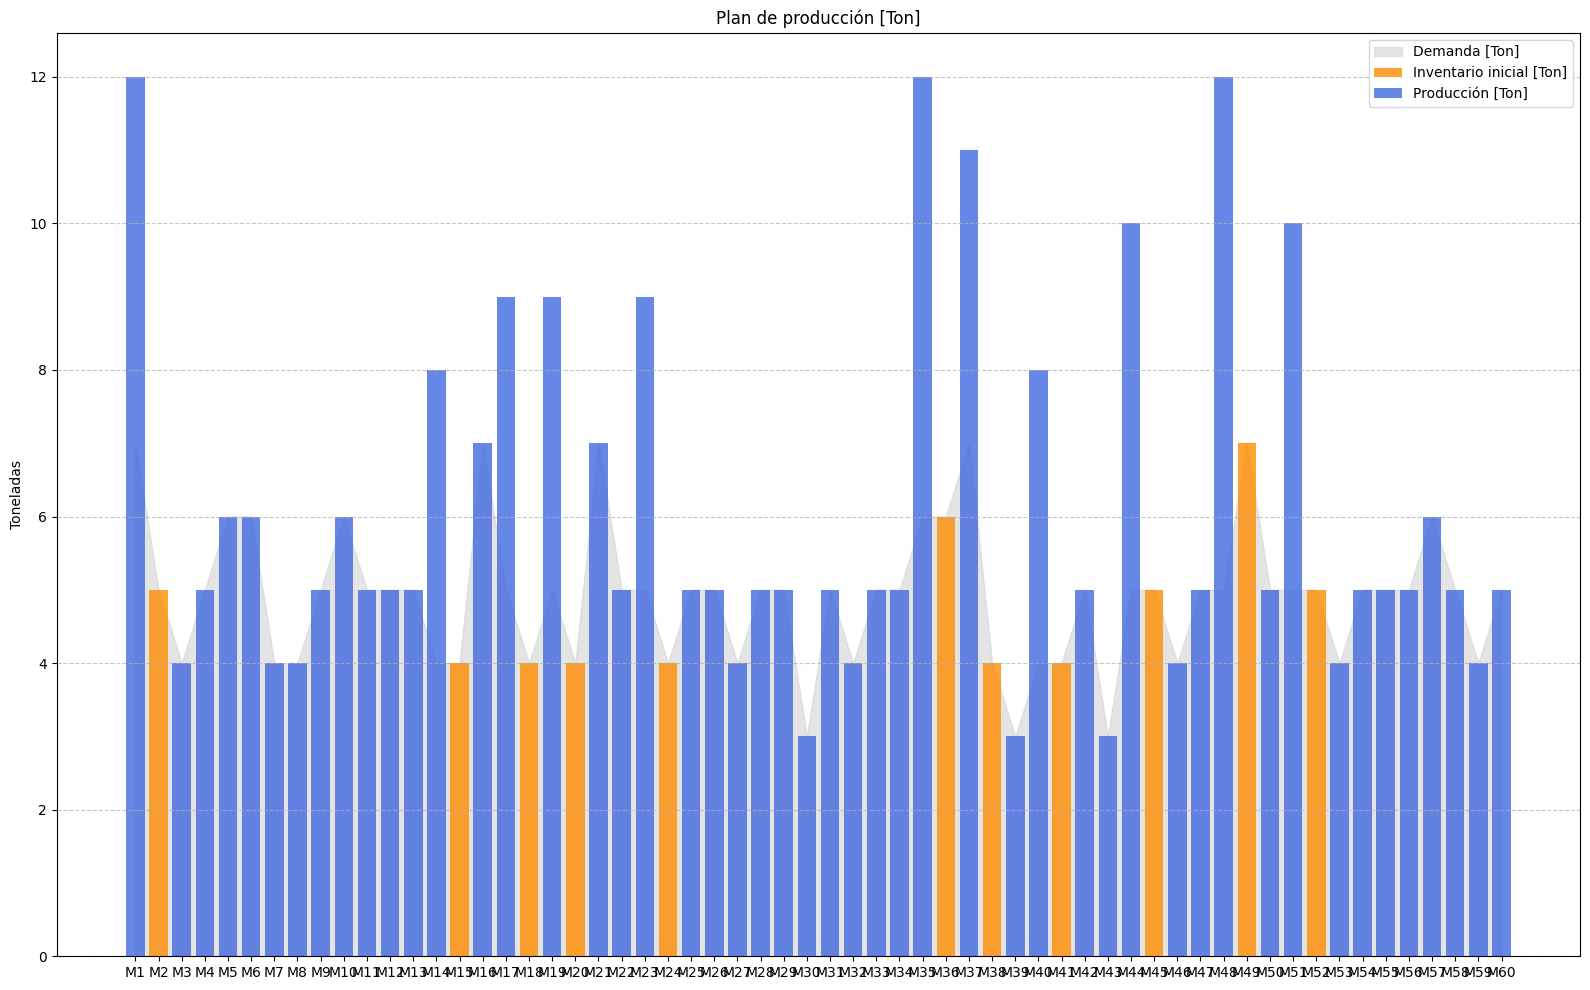

In [4]:
# ============================================================================
# Resolver modelo de inventario y registrar métricas de desempeño
# ============================================================================

# 1. Cronometrar solución del modelo
t0 = time.perf_counter()
model, x, I = optimizacion_inventario(M, c, h, d, I_0)
elapsed = time.perf_counter() - t0
print(f"\nTiempo de ejecución: {elapsed:.6f} s")

# 2. Objetivo óptimo (costo total)
obj_lp = round(lp.value(model.objective), 3)

# 3. Extraer valores de variables
produccion = {t: x[t].varValue for t in M}

#    Nota: Se reporta inventario inicial en período 1 y luego inventarios
#    resultantes del modelo desplazados a t+1 (para reflejar "fin de t").
inventario = {1: I_0, **{t + 1: I[t].varValue for t in M}}

# 4. Desglose de costos
cost_produccion = round(sum(x[t].varValue * c[t] for t in M), 3)
cost_inventario = round(sum(I[t].varValue * h[t] for t in M), 3)

# 5. Reporte
print(f'FO (valor total): {cost_produccion} (Producción) + {cost_inventario} (Inventario) = {obj_lp}')
print(f'Cantidad de toneladas pedidas (valor total): {sum(produccion.values())}.')
print(f'Cantidad de toneladas en inventario (valor total): {sum(inventario.values())}.')
plot_plan_produccion(M, d, produccion, inventario)

# 6. Registrar resultados
resultados.append({
    "Método"             : "LP",
    "Costo Total"        : obj_lp,
    "Costo producir"     : cost_produccion,
    "Costo inventario"   : cost_inventario,
    "Ton pedidas (total)": sum(produccion.values()),
    "Inventario(total)"  : sum(inventario.values()),
    "Tiempo (s)"         : elapsed
})


## Programación Dinámica

### Algoritmos de Solución

In [5]:
# ============================================================================
# Rutas adicionales para módulos de Programación Dinámica (DP)
# ============================================================================
sys.path.append(os.path.abspath("../DP/Env"))         # entorno de inventario
sys.path.append(os.path.abspath("../DP/Algorithms/")) # algoritmos DP
sys.path.append(os.path.abspath("../DP/Visual/"))     # utilidades de visualización

# ============================================================================
# Importar entorno de inventario (MDP)
# ============================================================================
from Inventory import InventoryEnv

# ============================================================================
# Algoritmos de DP
# ============================================================================
from value_iteration import value_iteration
from policy_evaluation import policy_evaluation
from policy_iteration import policy_iteration

# ============================================================================
# Herramientas de visualización / análisis de políticas y valores
# ============================================================================
from value_states import value_states_visual
from policy_dag import draw_policy_dag


#### Datos

In [6]:
# ============================================================================
# 1. Datos determinísticos por período (listas alineadas con M)
# ============================================================================
demand         = list(d.values())  # demanda por período
cost_producir  = list(c.values())  # costo de producción/compra por período
cost_almacenar = list(h.values())  # costo de mantenimiento por período

# ============================================================================
# 2. Parámetros del almacén / entorno MDP de inventario
# ============================================================================
capacity        = int(sum(demand) / 2)  # capacidad (heurística: 50% de la demanda total)
start_inventory = I_0                   # inventario inicial

# ============================================================================
# 3. Instanciar entorno de inventario y mostrar resumen
# ============================================================================
env = InventoryEnv(demand, cost_producir, cost_almacenar, capacity, start_inventory)
print(env)


InventoryEnv(Horizonte = 60, Capacidad = 147, #_Estados = 9028)


#### Policy Evaluation


Tiempo de ejecución: 0.317715 s
FO (valor total): 2019.87 (Producción) + 0.0 (Inventario) = 2019.87
Cantidad de toneladas pedidas (valor total): 294.
Cantidad de toneladas en inventario (valor total): 0.


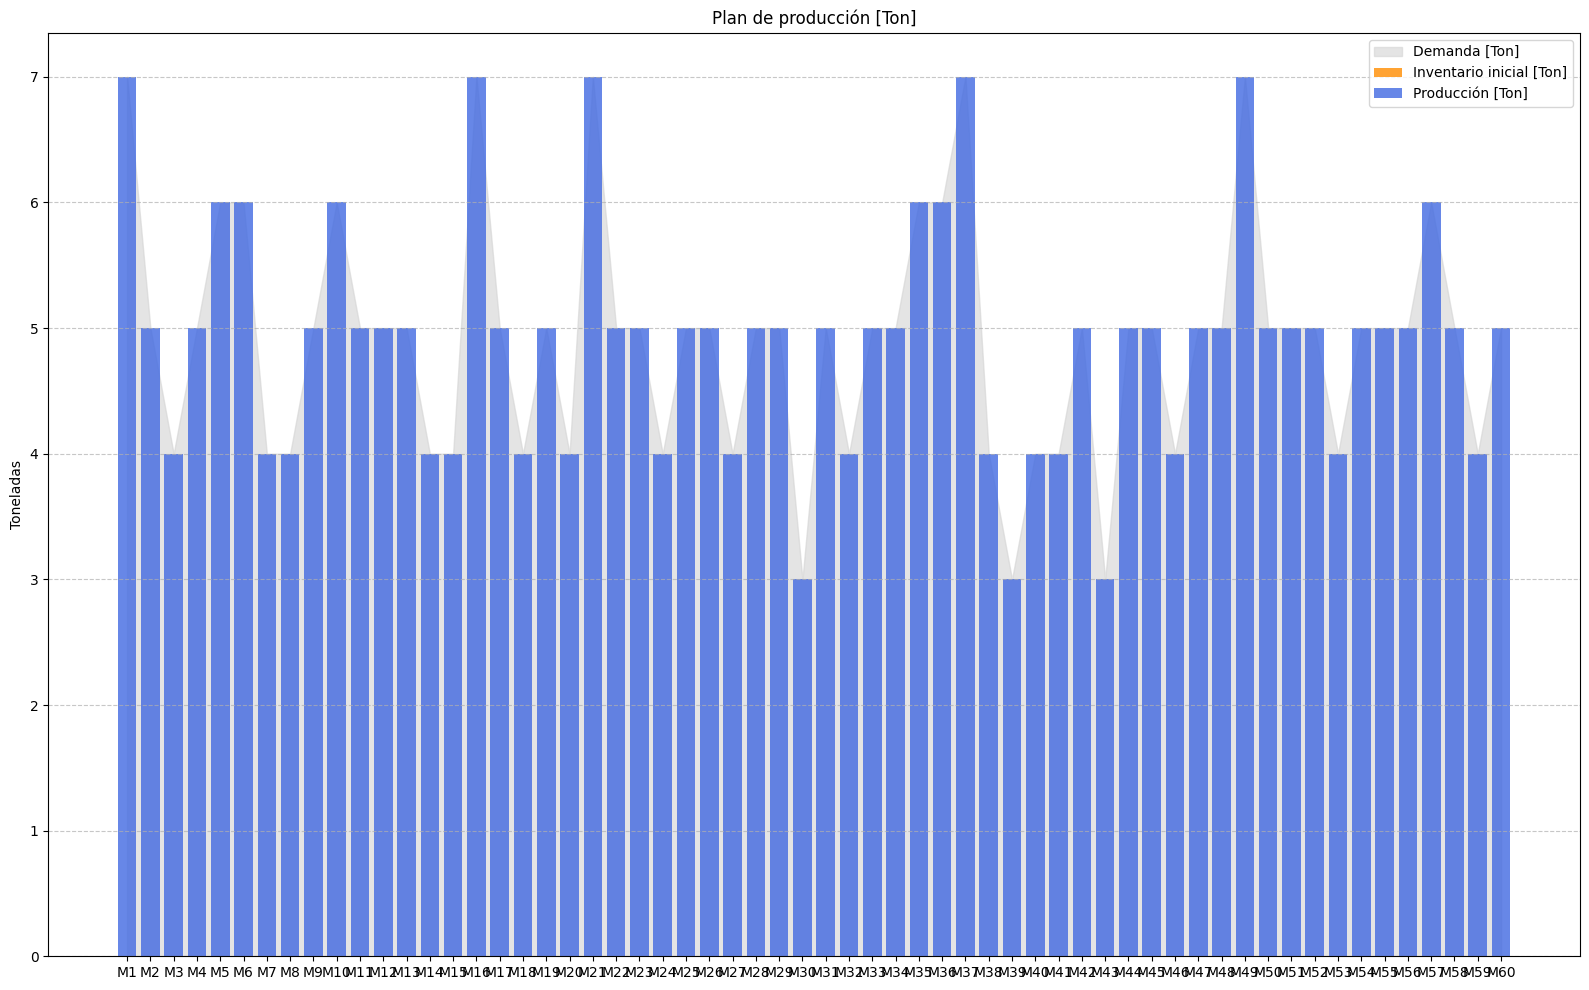

In [7]:
# ============================================================================
# Política determinista: ordenar justo lo faltante para cubrir demanda en t
# key = (t, S) donde S es inventario disponible; acción = max(0, demanda - S)
# ============================================================================
propose_policy = {
    (t, S): max(0, env.demand[t] - S)
    for t in range(env.n)
    for S in range(env.capacity + 1)
}

# Copia explícita (por si se modifica aparte)
policy = propose_policy.copy()

# ============================================================================
# Evaluar la política propuesta
# ============================================================================
t0 = time.perf_counter()
V = policy_evaluation(env, propose_policy)  # función de valor bajo política fija
elapsed = time.perf_counter() - t0
print(f"\nTiempo de ejecución: {elapsed:.6f} s")

# ============================================================================
# Reporte de costos y trayectorias inducidos por la política
# (nota: reutiliza nombre obj_lp aunque aquí proviene del entorno, no del LP)
# ============================================================================
obj_lp, costos_prod, costos_inv, produccion, inventario, trayecto = env.report_from_policy(policy)

# Registrar en tabla de resultados
resultados.append({
    "Método"             : "Policy evaluation",
    "Costo Total"        : obj_lp,
    "Costo producir"     : sum(costos_prod),
    "Costo inventario"   : sum(costos_inv),
    "Ton pedidas (total)": sum(produccion),
    "Inventario(total)"  : sum(inventario),
    "Tiempo (s)"         : elapsed
})


#### Policy Iteration


Tiempo de ejecución: 2.229381 s
FO (valor total): 1785.58 (Producción) + 111.52 (Inventario) = 1897.1
Cantidad de toneladas pedidas (valor total): 294.
Cantidad de toneladas en inventario (valor total): 52.


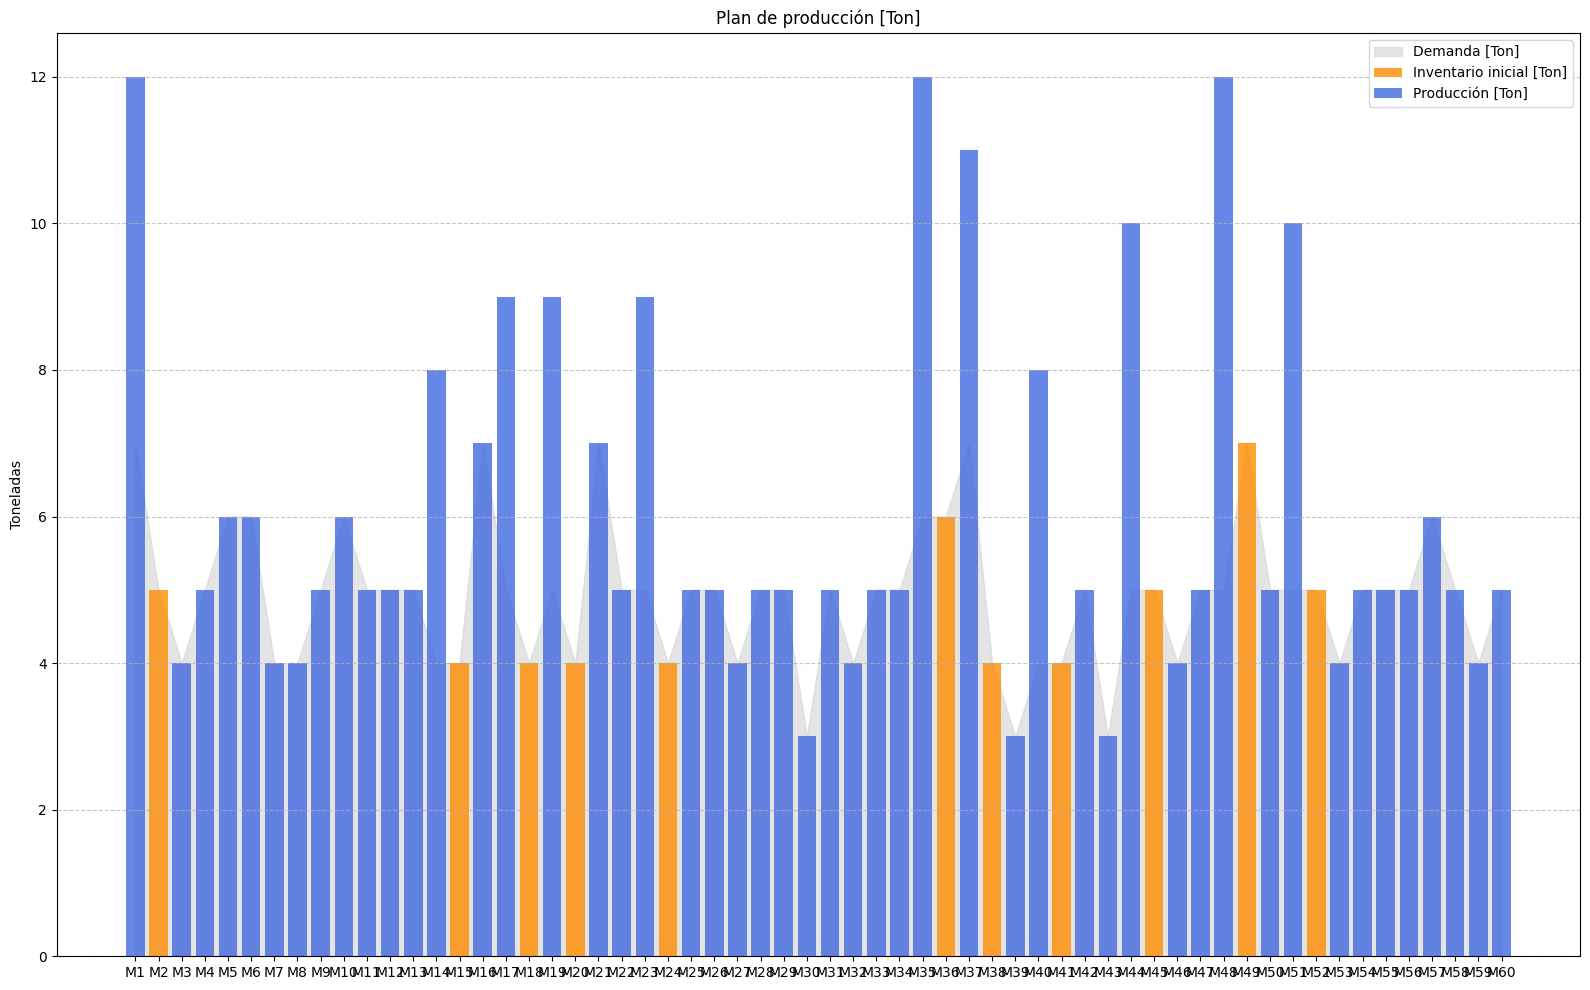

In [8]:
# ============================================================================
# Iteración de políticas: mejorar la política inicial hasta converger
# ============================================================================
t0 = time.perf_counter()
star_policy, V_star = policy_iteration(env, policy)  # retorna política mejorada y valores
elapsed = time.perf_counter() - t0
print(f"\nTiempo de ejecución: {elapsed:.6f} s")

# ============================================================================
# Costos inducidos por la política resultante (star_policy)
# ============================================================================
obj_lp, costos_prod, costos_inv, produccion, inventario, trayecto = env.report_from_policy(star_policy)

# Registrar resultados comparables
resultados.append({
    "Método"             : "Policy iteration",
    "Costo Total"        : obj_lp,
    "Costo producir"     : sum(costos_prod),
    "Costo inventario"   : sum(costos_inv),
    "Ton pedidas (total)": sum(produccion),
    "Inventario(total)"  : sum(inventario),
    "Tiempo (s)"         : elapsed
})


#### Value Iteration


Tiempo de ejecución: 52.305697 s
FO (valor total): 1785.58 (Producción) + 111.52 (Inventario) = 1897.1
Cantidad de toneladas pedidas (valor total): 294.
Cantidad de toneladas en inventario (valor total): 52.


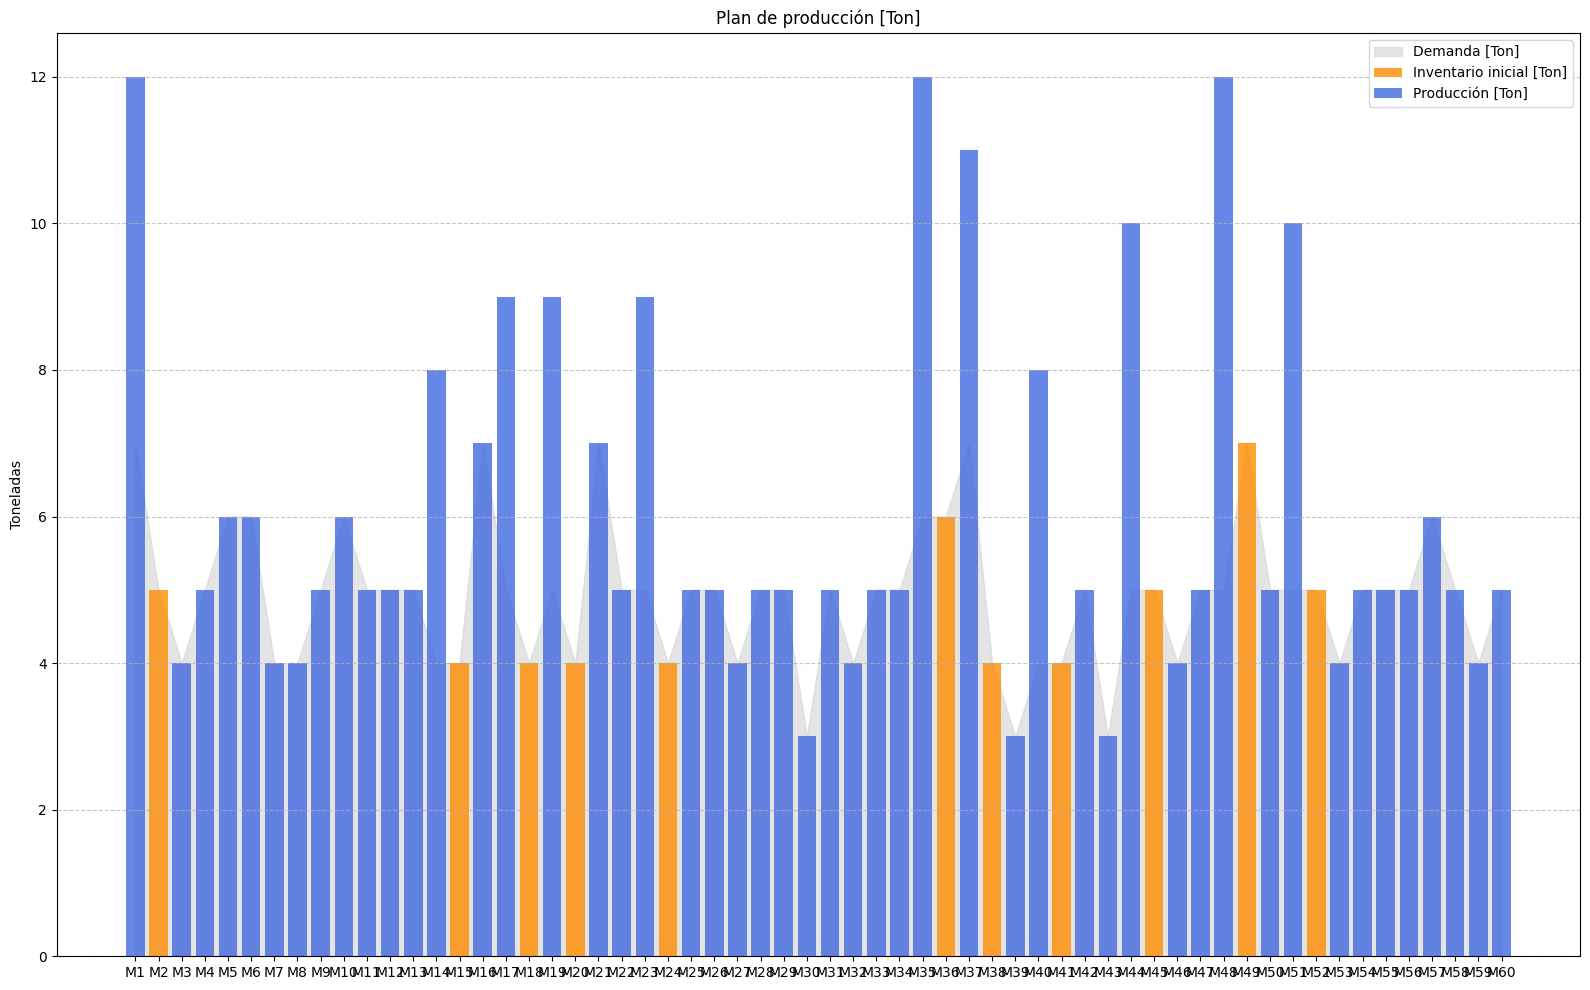

In [9]:
# ============================================================================
# Iteración de valores: resolver el MDP para obtener política óptima
# ============================================================================
t0 = time.perf_counter()
opt_policy, V_opt = value_iteration(env)  # política óptima y valores por estado
elapsed = time.perf_counter() - t0
print(f"\nTiempo de ejecución: {elapsed:.6f} s")

# ============================================================================
# Costos inducidos por la política óptima
# ============================================================================
obj_lp, costos_prod, costos_inv, produccion, inventario, trayecto = env.report_from_policy(opt_policy)

# Registrar resultados
resultados.append({
    "Método"             : "Value iteration",
    "Costo Total"        : obj_lp,
    "Costo producir"     : sum(costos_prod),
    "Costo inventario"   : sum(costos_inv),
    "Ton pedidas (total)": sum(produccion),
    "Inventario(total)"  : sum(inventario),
    "Tiempo (s)"         : elapsed
})


### Visualización

#### Value Functions

In [10]:
# ============================================================================
# Visualización condicional de V(s) para cada método aplicado
# ============================================================================
# Se muestran mapas de calor solo si el número de ítems (env.n) es razonable.
# Esto evita congestión visual en instancias grandes.
# ============================================================================

if env.capacity <= 15:

    # ----------------------------------------------------------------------
    # Evaluación de política heurística
    # ----------------------------------------------------------------------
    print("Policy Evaluation")
    value_states_visual(env, V, propose_policy)
    print()

    # ----------------------------------------------------------------------
    # Política óptima vía iteración de políticas
    # ----------------------------------------------------------------------
    print("Policy Iteration")
    value_states_visual(env, V_star, star_policy)
    print()

    # ----------------------------------------------------------------------
    # Política óptima vía iteración de valores
    # ----------------------------------------------------------------------
    print("Value Iteration")
    value_states_visual(env, V_opt, opt_policy)
    print()

else:
    print("Para visualizar, use una instancia más pequeña.")


Para visualizar, use una instancia más pequeña.


#### Policy

In [11]:
# ============================================================================
# Visualización condicional del DAG de decisiones para cada política evaluada
# ============================================================================
# Dibuja el grafo dirigido de estados con la trayectoria tomada por:
#   • Política heurística
#   • Iteración de políticas
#   • Iteración de valores
# Solo se activa para instancias pequeñas (n ≤ 20).
# ============================================================================

if env.capacity <= 15:

    # ----------------------------------------------------------------------
    # Política heurística: tomar cuando sea legal
    # ----------------------------------------------------------------------
    print("Policy Evaluation")
    draw_policy_dag(env, propose_policy, initial_state=(0, env.start_inventory))
    print()

    # ----------------------------------------------------------------------
    # Política óptima vía iteración de políticas
    # ----------------------------------------------------------------------
    print("Policy Iteration")
    draw_policy_dag(env, star_policy, initial_state=(0, env.start_inventory))
    print()

    # ----------------------------------------------------------------------
    # Política óptima vía iteración de valores
    # ----------------------------------------------------------------------
    print("Value Iteration")
    draw_policy_dag(env, opt_policy, initial_state=(0, env.start_inventory))
    print()

else:
    print("Para visualizar, use una instancia más pequeña.")


Para visualizar, use una instancia más pequeña.


## Heurísticas

### EOQ

**¿Para qué sirve?**
Elegir un tamaño de pedido \$Q^\*\$ que minimiza el costo total anual de ordenar y mantener inventario cuando la demanda es conocida y no se permiten faltantes.


**Parámetros básicos**

* \$D\$: demanda total anual (u horizonte elegido).
* \$K\$: costo fijo por pedido (setup).
* \$h\$: costo de mantener 1 unidad en inventario por año (misma unidad de tiempo que \$D\$).
* \$L\$: lead time (años o fracción compatible con \$D\$).
* \$d = D / \text{(unidades de tiempo en el año)}\$: tasa de consumo.

**Fórmulas clave**

Tamaño de lote económico:
\$Q^\* = \sqrt{\frac{2 D K}{h}}\$

Punto de pedido (cuándo reordenar):
\$R = d \cdot L\$

Costo total mínimo (orden + mantenimiento, sin costo unitario):
\$TC(Q^\*) = \sqrt{2 D K h}\$

Inventario promedio en ciclo EOQ: \$Q^\*/2\$.

**Ciclo EOQ (intuición)**

Inventario sube a \$Q^\*\$ cuando llega un pedido, luego cae linealmente a 0 mientras consumes. Cuando el inventario baja a \$R\$, colocas un nuevo pedido; llega justo cuando ibas a quedar en 0, evitando faltantes.

**Algoritmo EOQ**

1. Calcula \$Q^\*\$ y \$R\$.
2. Inicializa inventario \$I = I\_0\$.
3. Repite mientras haya horizonte:

   * Si \$I \le R\$: emitir pedido por \$Q^\*\$ (llega tras \$L\$).
   * Avanza el tiempo; cuando llegue el pedido, suma \$Q^\*\$ a \$I\$.
   * Cada unidad de tiempo descuenta demanda \$d\$ de \$I\$.
   * Asegura \$I \ge 0\$ (si proyectas negativo antes de llegada, pide antes o ajusta \$R\$).

**Variante discreta por períodos (cuando demanda cambia por período)**

Para datos tabulares \$d\_t\$:

1. Ordena períodos \$M = {1,\dots,n}\$.
2. Calcula \$EOQ\$ (puedes usar \$D = \sum\_t d\_t\$ y costos promedio para aproximar).
3. Desde el período actual:

   * Acumula demanda futura hasta que la suma \$\ge EOQ\$ (o llegues al fin del horizonte).
   * Produce en el período inicial lo que falte para cubrir esa demanda acumulada (dado inventario disponible).
   * Consume período a período; sin faltantes (si se proyecta negativo, incrementa la producción inicial del bloque).
   * Salta al siguiente período no cubierto y repite.


In [12]:
import math

def heuristica_eoq(M, d, I_0, EOQ, debug=False):
    """
    Heurística tipo EOQ / lot-sizing por agrupación de períodos.
    Produce en el período t_ini lo necesario para cubrir demanda acumulada
    de un bloque de períodos hasta alcanzar EOQ (o fin de horizonte), usando
    inventario disponible. Sin faltantes (se ajusta producción si ocurre).

    Parámetros
      M     : lista ordenada de períodos (índices).
      d     : dict[t] demanda en t.
      I_0   : inventario inicial antes del primer período.
      EOQ   : tamaño económico de lote deseado (umbral de demanda acumulada).
      debug : imprime trazas si True.

    Devuelve
      obj_lp         : ***no definido en esta función*** (placeholder; calc. externo).
      produccion     : dict[t] unidades producidas en t (solo al inicio de lote).
      inventario_ini : dict[t] inventario al inicio de t (antes de producir/consumir en t).
      inventario_fin : dict[t] inventario al final de t (después de consumo).
    """

    n = len(M)
    produccion     = {t: 0 for t in M}
    inventario_ini = {}   # inv al inicio de t (antes de producir en lote que arranca en t)
    inventario_fin = {}   # inv al final de t (para costos de holding)

    inv = I_0  # inventario disponible al inicio del período actual
    idx = 0

    while idx < n:
        t_ini = M[idx]

        # inventario inicial del período donde inicia el lote
        inventario_ini[t_ini] = inv

        # agrupar períodos hasta alcanzar EOQ o fin del horizonte
        demanda_acum = 0
        k = 0
        while idx + k < n and demanda_acum < EOQ:
            demanda_acum += d[M[idx + k]]
            k += 1
        # al salir: bloque = períodos idx .. idx+k-1; demanda_acum cubre ese bloque

        # producir en t_ini lo faltante para cubrir el bloque dado el inventario actual
        q = max(0, demanda_acum - inv)
        produccion[t_ini] += q
        inv += q  # producción disponible de inmediato

        if debug:
            print(f"\n[Lote inicia en {t_ini}] inv_ini={inventario_ini[t_ini]}  demanda_lote={demanda_acum}  prod={q}")

        # consumir demanda período a período dentro del bloque
        for j in range(k):
            t_cur = M[idx + j]

            # registrar inventario inicial en períodos intermedios del bloque (no se produce)
            if j > 0:
                inventario_ini[t_cur] = inv

            inv -= d[t_cur]

            # no se permiten faltantes: si ocurren, aumentar producción retroactivamente en t_ini
            if inv < 0:
                faltante = -inv
                if debug:
                    print(f"  Ajuste: faltante {faltante} detectado en {t_cur}; aumentando prod en {t_ini}.")
                produccion[t_ini] += faltante
                inv = 0  # después del ajuste quedamos en cero (cubre exactamente)

            inventario_fin[t_cur] = inv
            if debug:
                print(f"    Fin {t_cur}: inv_fin={inv}")

        # avanzar al siguiente bloque
        idx += k

    # asegurar claves completas en las estructuras de salida
    for t in M:
        inventario_ini.setdefault(t, 0)
        inventario_fin.setdefault(t, 0)
        produccion.setdefault(t, 0)

    # NOTA: obj_lp no se calcula aquí; debe computarse con los vectores de costo.
    return obj_lp, produccion, inventario_ini, inventario_fin



Tiempo de ejecución: 0.000091 s
FO (valor total): 1861.87 (Producción) + 3290.66 (Inventario) = 5152.53
Cantidad de toneladas producidas (valor total): 294.
Cantidad de toneladas en inventario (valor total): 816.


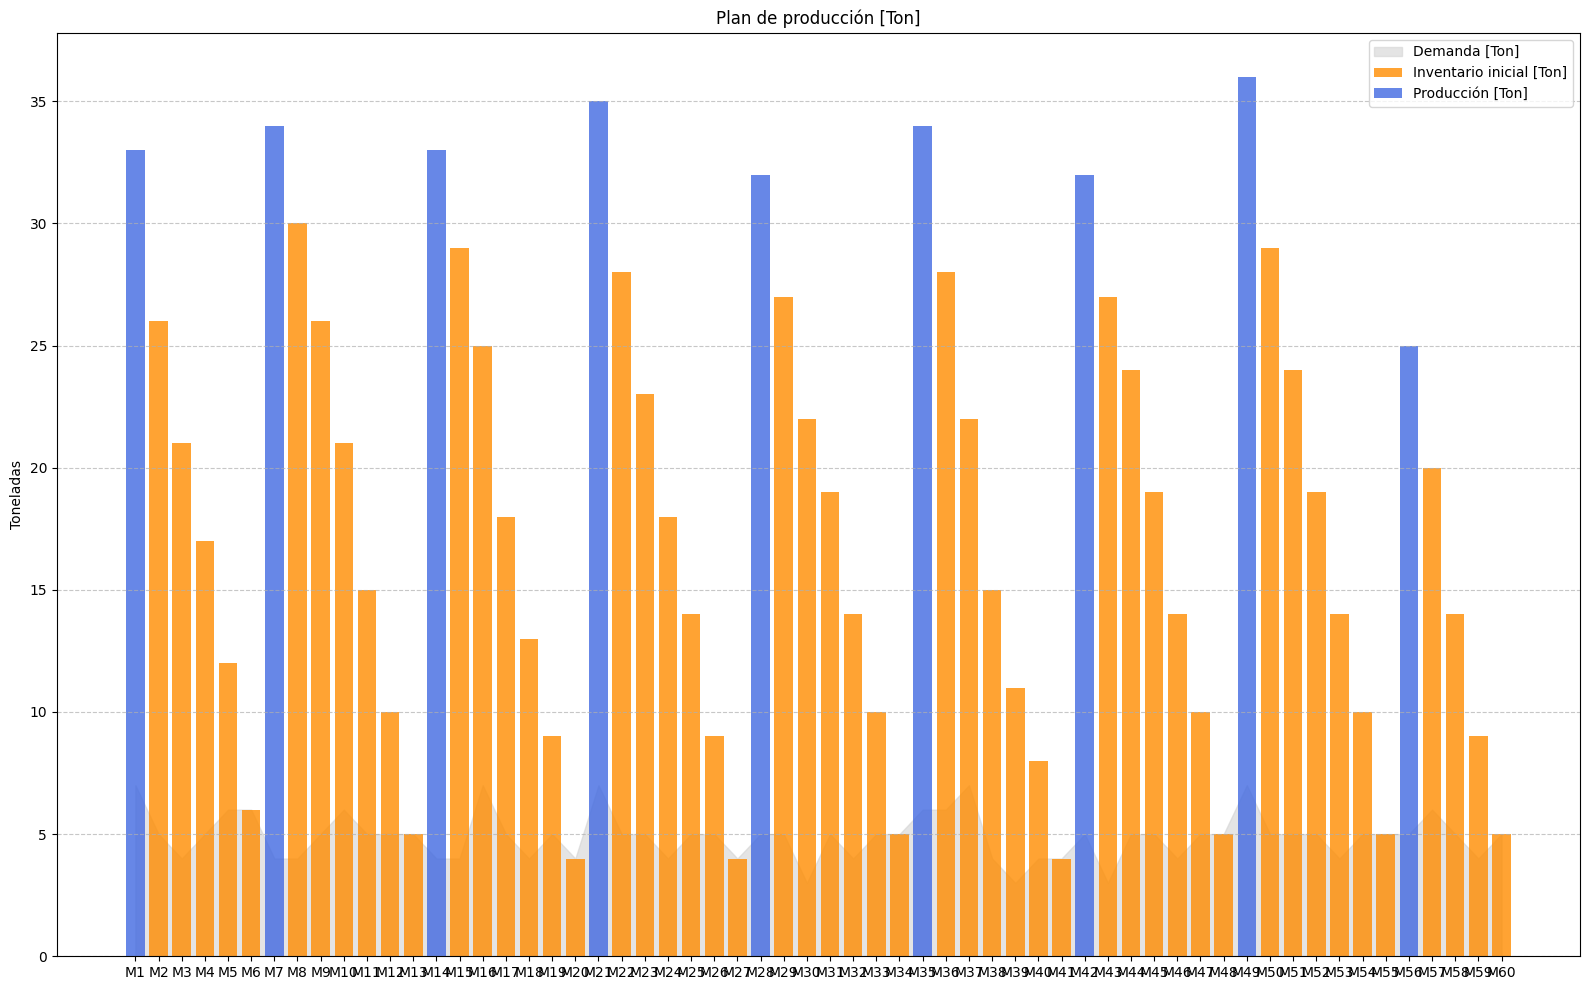

In [13]:
# ============================================================================
# Calcular EOQ aproximado a partir de demanda total y costos promedio
# ============================================================================
D_total = sum(d[t] for t in M)                 # demanda total
H_prom  = sum(h[t] for t in M) / len(M)        # holding promedio
C_prom  = sum(c[t] for t in M) / len(M)        # producción promedio
EOQ = math.sqrt(2 * D_total * C_prom / H_prom) # fórmula EOQ clásica

# ============================================================================
# Ejecutar heurística EOQ
# ============================================================================
t0 = time.perf_counter()
obj_lp, produccion, inventario, inventario_fin = heuristica_eoq(M, d, I_0, EOQ)
elapsed = time.perf_counter() - t0
print(f"\nTiempo de ejecución: {elapsed:.6f} s")

# ============================================================================
# Costos (holding usa inventario_fin)
# ============================================================================
cost_produccion = sum(produccion[t] * c[t] for t in M)
cost_inventario = sum(inventario_fin[t] * h[t] for t in M)
obj_lp = cost_produccion + cost_inventario  # recalculado aquí

# ============================================================================
# Reporte
# ============================================================================
print(f'FO (valor total): {cost_produccion:.2f} (Producción) + {cost_inventario:.2f} (Inventario) = {obj_lp:.2f}')
print(f'Cantidad de toneladas producidas (valor total): {sum(produccion.values())}.')
print(f'Cantidad de toneladas en inventario (valor total): {sum(inventario_fin.values())}.')
plot_plan_produccion(M, d, produccion, inventario)

# ============================================================================
# Registrar resultados
# ============================================================================
resultados.append({
    "Método"             : "EOQ",
    "Costo Total"        : obj_lp,
    "Costo producir"     : cost_produccion,
    "Costo inventario"   : cost_inventario,
    "Ton pedidas (total)": sum(produccion.values()),
    "Inventario(total)"  : sum(inventario_fin.values()),
    "Tiempo (s)"         : elapsed
})


### Política (s, S)


**Idea:** Cada período revisas el inventario inicial. Si cae por debajo de $s$, repones hasta $S$. Además, aseguras cubrir la demanda del período (no se permiten faltantes).

**Parámetros:**
$s$ = punto de disparo.
$S$ = nivel objetivo tras reponer (idealmente $S > s$).
$d_t$ = demanda en el período $t$.
$I_0$ = inventario inicial.

**Pasos por período $t$:**

1. Observa $I_t^{ini}$.
2. Si $I_t^{ini} < s$: $q_t = S - I_t^{ini}$; de lo contrario $q_t = 0$.
3. Cobertura de demanda: si $I_t^{ini} + q_t < d_t$, incrementa $q_t$ en $d_t - (I_t^{ini} + q_t)$.
4. Inventario final: $I_t^{fin} = I_t^{ini} + q_t - d_t$.
5. Sin faltantes: si $I_t^{fin} < 0$, aumenta $q_t$ en el faltante y fija $I_t^{fin} = 0$.
6. Registra $q_t$, $I_t^{ini}$, $I_t^{fin}$. Usa $I_t^{fin}$ como inventario inicial del siguiente período.

**Costo típico en el horizonte $M$:**

$$
C = \sum_{t \in M} c_t\, q_t \;+\; \sum_{t \in M} h_t\, I_t^{fin}
$$



In [14]:
def heuristica_ss(M, d, I_0, s, S, debug=False):
    """
    Heurística (s, S) con cobertura de demanda del período.
    Si inventario < s, reponer hasta S; si no, no producir.
    Luego asegurar que la producción cubra d[t] (sin faltantes).
    
    Params:
      M : lista ordenada de períodos.
      d : dict[t] demanda en t.
      I_0 : inventario inicial.
      s, S : parámetros de política (s<S).
      debug : trazas opcionales.
    
    Returns:
      obj_lp (placeholder, calc. externo),
      produccion[t],
      inventario_ini[t],
      inventario_fin[t].
    """
    produccion     = {t: 0 for t in M}
    inventario_ini = {}
    inventario_fin = {}

    inv = I_0  # inventario al inicio del período actual

    for t in M:
        # inventario inicial (para graficar / reporte)
        inventario_ini[t] = inv

        # regla (s,S): ¿reponer?
        if inv < s:
            q = S - inv
        else:
            q = 0

        # garantizar cobertura de demanda del período (no faltantes)
        if inv + q < d[t]:
            q += d[t] - (inv + q)

        produccion[t] = q
        inv += q  # producción disponible antes de satisfacer demanda

        # consumir demanda
        inv -= d[t]

        # protección numérica: no negativos
        if inv < 0:
            if debug:
                print(f"Ajuste tardío en {t}: faltante {-inv}; incrementando producción.")
            produccion[t] += -inv
            inv = 0

        inventario_fin[t] = inv

        if debug:
            print(f"t={t} inv_ini={inventario_ini[t]} prod={produccion[t]} demanda={d[t]} inv_fin={inventario_fin[t]}")

    # obj_lp no se computa aquí; calcúlalo externamente con costos.
    return obj_lp, produccion, inventario_ini, inventario_fin



Tiempo de ejecución: 0.000043 s
FO (valor total): 2032.42 (Producción) + 47.96 (Inventario) = 2080.38
Cantidad de toneladas producidas (valor total): 294.0.
Cantidad de toneladas en inventario (valor total): 12.5.


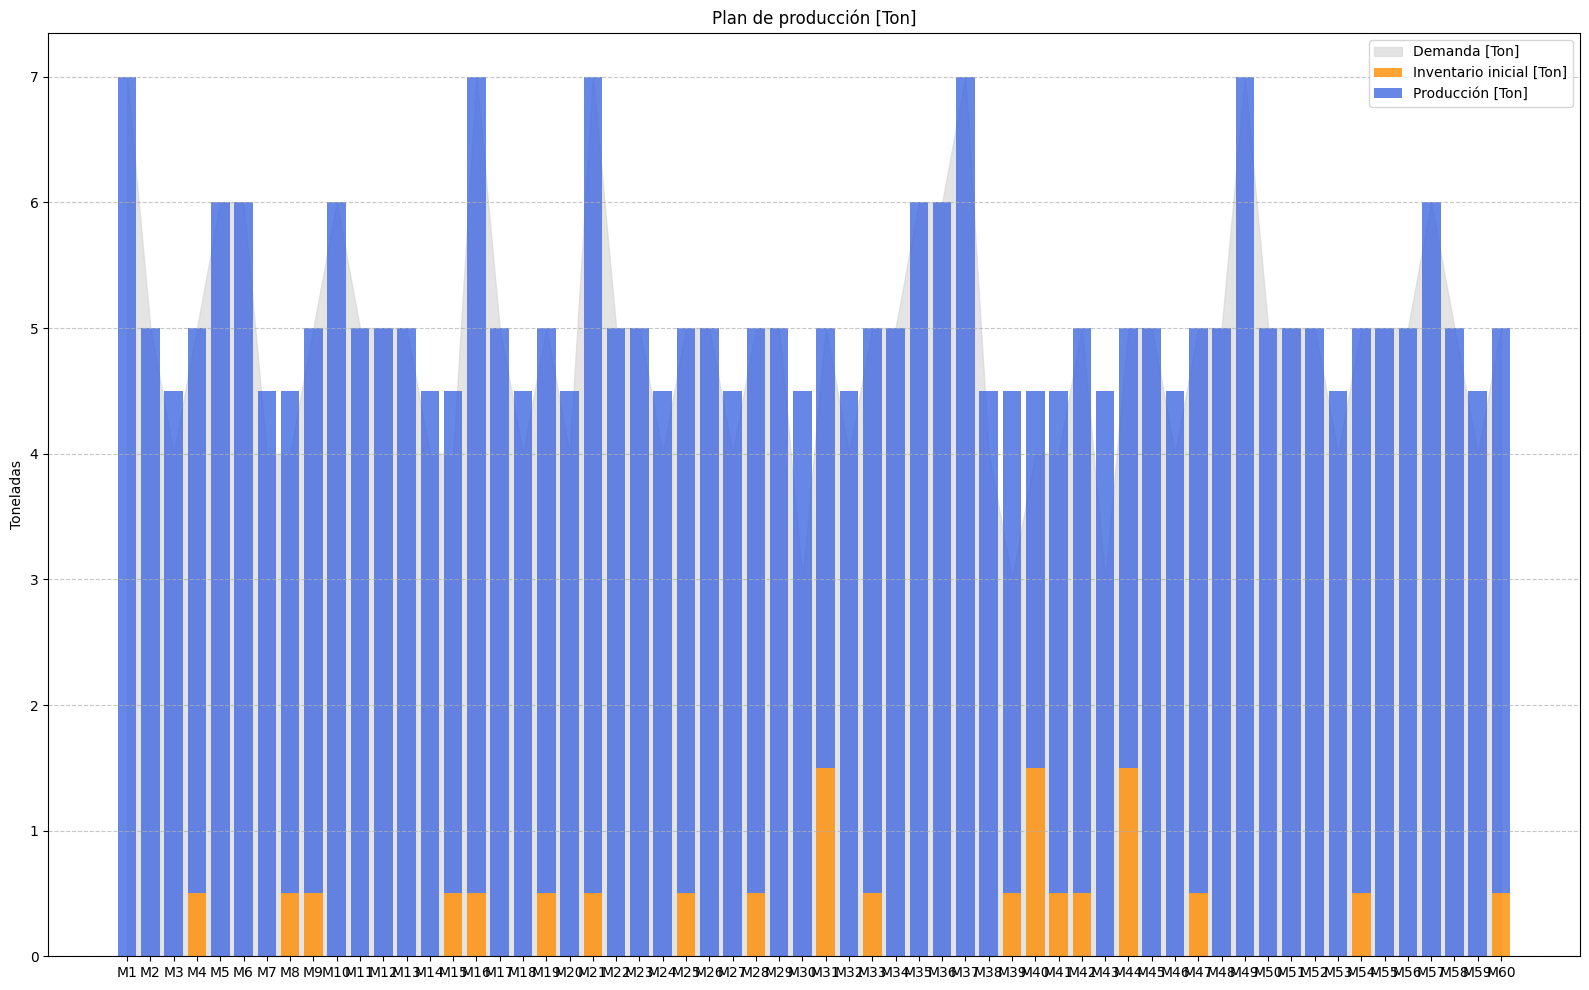

In [15]:
# ============================================================================
# Parámetros de política (s,S)
# ============================================================================
s = max(d.values())          # umbral de disparo: si inv < s, se repone
S = 1.5 * min(d.values())    # nivel objetivo tras reponer (ojo: puede quedar S < s)

# ============================================================================
# Ejecutar heurística (s,S)
# ============================================================================
t0 = time.perf_counter()
obj_lp, produccion, inventario, inventario_fin = heuristica_ss(M, d, I_0, s, S)
elapsed = time.perf_counter() - t0
print(f"\nTiempo de ejecución: {elapsed:.6f} s")

# ============================================================================
# Costos (holding usando inventario inicial; usar inventario_fin si corresponde)
# ============================================================================
cost_produccion = sum(produccion[t] * c[t] for t in M)
cost_inventario = sum(inventario[t] * h[t] for t in M)
obj_lp = cost_produccion + cost_inventario

# ============================================================================
# Reporte
# ============================================================================
print(f'FO (valor total): {cost_produccion:.2f} (Producción) + {cost_inventario:.2f} (Inventario) = {obj_lp:.2f}')
print(f'Cantidad de toneladas producidas (valor total): {sum(produccion.values())}.')
print(f'Cantidad de toneladas en inventario (valor total): {sum(inventario.values())}.')
plot_plan_produccion(M, d, produccion, inventario)

# ============================================================================
# Registrar resultados
# ============================================================================
resultados.append({
    "Método"             : "(s,S)",
    "Costo Total"        : obj_lp,
    "Costo producir"     : cost_produccion,
    "Costo inventario"   : cost_inventario,
    "Ton pedidas (total)": sum(produccion.values()),
    "Inventario(total)"  : sum(inventario.values()),
    "Tiempo (s)"         : elapsed
})


### Silver-Meal

**Idea:** Decidir cuántos períodos cubrir con un solo lote. Comienzas en un período $i$, calculas el costo promedio por período de producir lo necesario para cubrir $i..j$, y vas extendiendo $j$ mientras ese costo promedio **no aumente**. Cuando sube, te quedas con el último $j$ “bueno”, produces al inicio $i$ lo que falte para cubrir ese bloque y avanzas al siguiente período no cubierto. No se permiten faltantes: si en la ejecución el inventario llegara a negativo, aumentas la producción inicial del bloque.


**Parámetros:**
$M$: períodos ordenados.
$d_t$: demanda en $t$.
$h_t$: costo de mantener inventario al final de $t$.
$K$: costo de preparación (setup) por lote.
$I_0$: inventario inicial.


**Evaluar un bloque $i..j$:**
Demanda acumulada $D_{i:j} = \sum_{u=i}^j d_u$.
Producción necesaria $q_i = \max(0, D_{i:j} - I_i^{ini})$.
Inventario proyectado al final de cada período $u$ dentro del bloque: $I_u^{proj} = I_i^{ini} + q_i - \sum_{v=i}^u d_v$ (truncar a 0 si negativo; sin faltantes).
Costo holding del bloque: $\sum_{u=i}^j h_u I_u^{proj}$.
Costo total bloque: $K + \text{holding}$.
Costo promedio: $\overline{C}_{i:j} = (K + \sum_{u=i}^j h_u I_u^{proj}) / (j - i + 1)$.


**Regla Silver-Meal:** Extiende $j$ de forma incremental. Mientras $\overline{C}_{i:j} \le \overline{C}_{i:j-1}$, sigues extendiendo. Cuando sube, detienes y usas el último $j$ aceptado.


**Pseudocódigo (resumido, sin código ejecutable):**

1. Fija índice de inicio $i$ (primer período no cubierto); $I_i^{ini}$ es inventario disponible.
2. Para $j = i, i+1, \dots$:

   * Calcula $D_{i:j}$, $q_i$, inventarios proyectados y costo promedio $\overline{C}_{i:j}$.
   * Si $j = i$ o $\overline{C}_{i:j} \le \overline{C}_{i:j-1}$: guarda $j$ como mejor.
   * Si $\overline{C}_{i:j} > \overline{C}_{i:j-1}$: detén búsqueda.
3. Produce $q_i$ en período $i$ para cubrir $i..j^\*$ (último aceptado).
4. Simula consumos reales período a período dentro del bloque; si inventario cae <0 en algún período, aumenta producción inicial $q_i$ en el faltante y fija inventario en 0 (sin faltantes).
5. Avanza $i \leftarrow j^\* + 1$ y repite hasta fin de $M$.


**Costo total en el horizonte:**
$C = \sum_{\text{lotes}} K + \sum_{t \in M} h_t I_t^{fin} + \sum_{t \in M} c_t q_t$ (incluye costo unitario si lo registras; en el cálculo de decisión Silver-Meal, $c_t$ suele omitirse porque no cambia con la longitud del bloque, pero puedes agregarlo al reporte final).


In [16]:
def heuristica_silver_meal(M, c, h, d, I_0, debug=False):
    """
    Heurística Silver-Meal (lot-sizing aproximado).
    Extiende lote desde período i mientras el costo promedio (setup+holding)/período
    no aumente. Ajusta producción para evitar faltantes.

    Parámetros:
      M   : lista ordenada de períodos.
      c,h : dict[t] costos de producción y holding.
      d   : dict[t] demanda por período.
      I_0 : inventario inicial antes del primer período.
      debug : trazas opcionales.

    Retorna:
      obj_lp (placeholder; calc. externo),
      produccion[t], inventario_ini[t], inventario_fin[t].
    """
    # Setup aproximado (no provisto en datos): múltiplo del costo medio p/ período
    K = (sum(c[t] for t in M) / len(M)) * 5.0

    n = len(M)
    produccion     = {t: 0 for t in M}
    inventario_ini = {}
    inventario_fin = {}

    inv = I_0   # inventario disponible al inicio del período actual
    idx = 0

    while idx < n:
        i      = idx
        t_ini  = M[i]
        inv_start = inv

        # inventario inicial en el período que inicia el lote
        inventario_ini[t_ini] = inv_start

        # explorar extensión del lote j = i..n-1
        prev_avg = float("inf")
        best_len = 1
        cum_dem  = 0

        for j in range(i, n):
            t_j = M[j]
            cum_dem += d[t_j]  # demanda acumulada i..j

            # prod neta requerida si cubro i..j
            net_prod = max(0, cum_dem - inv_start)

            # proyectar inventario período a período para costo holding
            inv_tmp   = inv_start + net_prod
            hold_cost = 0
            for r in range(i, j + 1):
                inv_tmp -= d[M[r]]
                if inv_tmp < 0:
                    inv_tmp = 0  # sin backorders en proyección
                hold_cost += inv_tmp * h[M[r]]

            total_cost = K + hold_cost
            avg_cost   = total_cost / (j - i + 1)

            if debug:
                print(f"Eval lote {t_ini}..{t_j}: total={total_cost:.2f}, avg={avg_cost:.2f}")

            # regla Silver-Meal: parar cuando aumenta costo promedio
            if avg_cost <= prev_avg:
                best_len = j - i + 1
                prev_avg = avg_cost
            else:
                break

        # lote elegido: i .. i+best_len-1
        lote_len = best_len
        lot_dem  = sum(d[M[r]] for r in range(i, i + lote_len))
        q        = max(0, lot_dem - inv_start)

        # producir en período inicial
        produccion[t_ini] += q
        inv += q

        if debug:
            print(f"\n[Lote definitivo {t_ini} cubre {lote_len} períodos] prod={q} inv_start={inv_start}")

        # consumir dentro del lote y registrar inventarios
        for r in range(i, i + lote_len):
            t_r = M[r]
            if r > i:
                inventario_ini[t_r] = inv  # arrastre

            inv -= d[t_r]
            if inv < 0:
                # ajuste anti-faltantes (retroproduce en t_ini)
                faltante = -inv
                produccion[t_ini] += faltante
                inv = 0
                if debug:
                    print(f"  Ajuste faltante en {t_r}: +{faltante} prod en {t_ini}.")

            inventario_fin[t_r] = inv

        # siguiente bloque
        idx += lote_len

    # completar claves faltantes (por seguridad)
    for t in M:
        inventario_ini.setdefault(t, 0)
        inventario_fin.setdefault(t, 0)
        produccion.setdefault(t, 0)

    # obj_lp no se calcula aquí; hazlo con costos externos.
    return obj_lp, produccion, inventario_ini, inventario_fin



Tiempo de ejecución: 0.000180 s
FO (valor total): 1908.67 (Producción) + 519.05 (Inventario) = 2427.72
Cantidad de toneladas producidas (valor total): 294.
Cantidad de toneladas en inventario fin (valor total): 143.


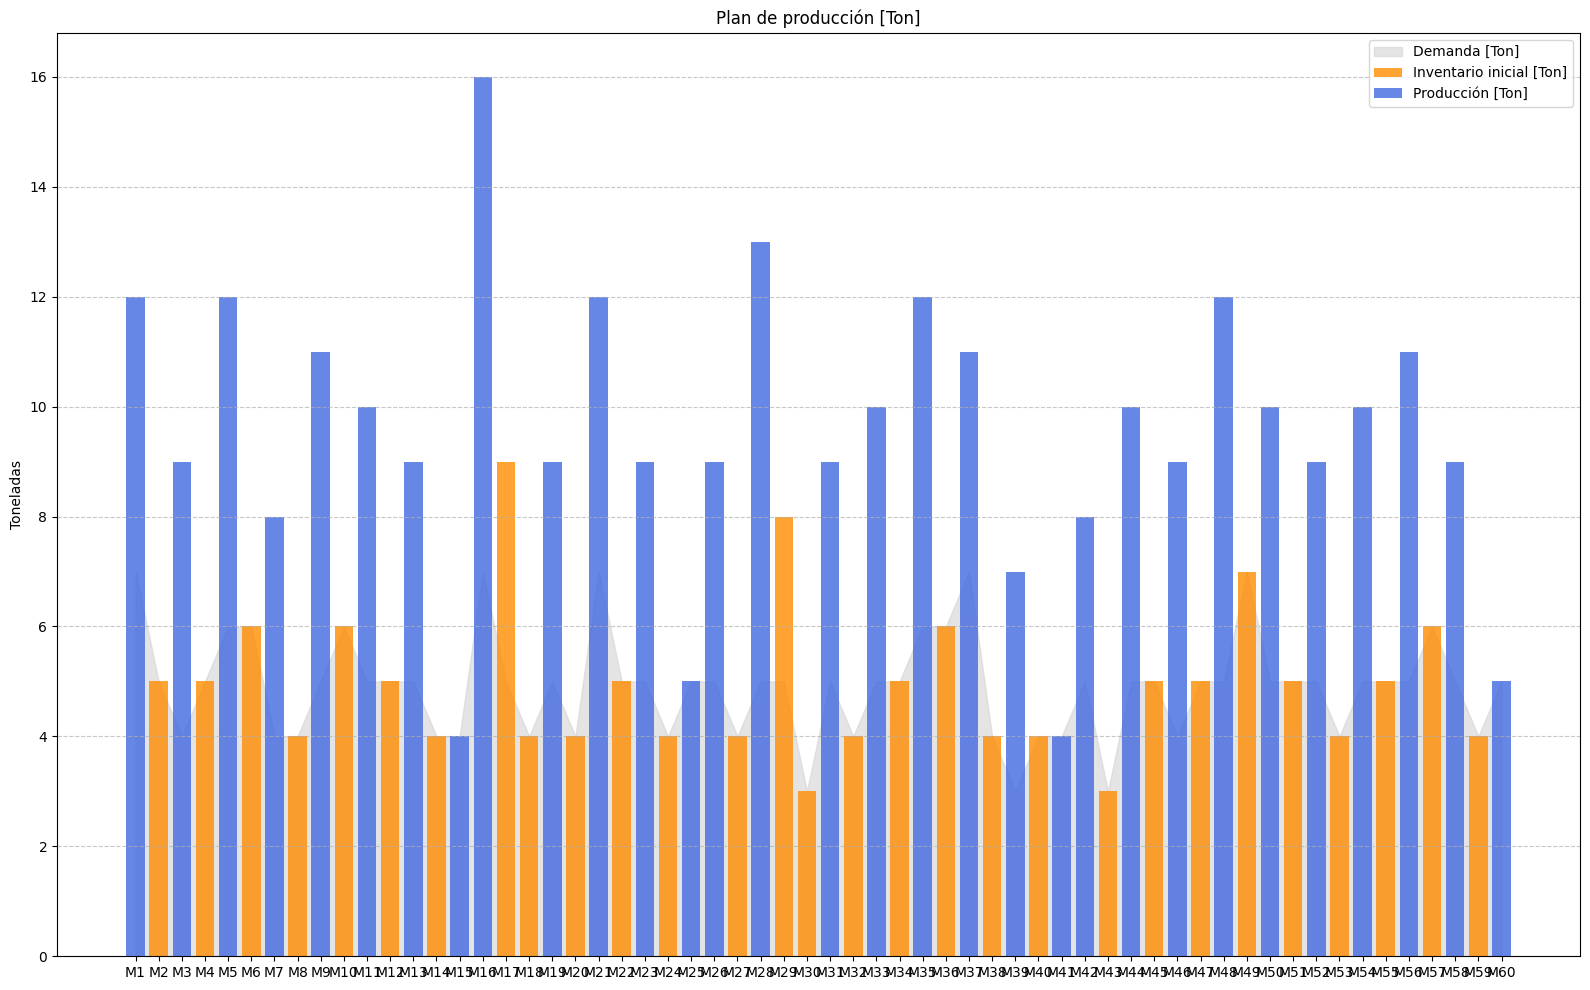

In [17]:
# ============================================================================
# Ejecutar heurística Silver-Meal y registrar resultados
# ============================================================================
t0 = time.perf_counter()
obj_lp, produccion, inventario, inventario_fin = heuristica_silver_meal(M, c, h, d, I_0)
elapsed = time.perf_counter() - t0
print(f"\nTiempo de ejecución: {elapsed:.6f} s")

# Costos (recalculamos desde salidas de la heurística)
cost_produccion = sum(produccion[t] * c[t] for t in M)
cost_inventario = sum(inventario_fin[t] * h[t] for t in M)  # holding sobre inventario final
obj_lp = cost_produccion + cost_inventario

# Reporte
print(f'FO (valor total): {cost_produccion:.2f} (Producción) + {cost_inventario:.2f} (Inventario) = {obj_lp:.2f}')
print(f'Cantidad de toneladas producidas (valor total): {sum(produccion.values())}.')
print(f'Cantidad de toneladas en inventario fin (valor total): {sum(inventario_fin.values())}.')
plot_plan_produccion(M, d, produccion, inventario)

# Registrar
resultados.append({
    "Método"             : "Silver-Meal",
    "Costo Total"        : obj_lp,
    "Costo producir"     : cost_produccion,
    "Costo inventario"   : cost_inventario,
    "Ton pedidas (total)": sum(produccion.values()),
    "Inventario(total)"  : sum(inventario_fin.values()),
    "Tiempo (s)"         : elapsed
})


## Resultados

In [18]:
import pandas as pd

# -- Crear DataFrame desde la lista de resultados --
df_resultados = pd.DataFrame(resultados)

# -- Establecer 'Método' como índice --
df_resultados.set_index("Método", inplace=True)

# -- Ordenar por empleos generados (de mayor a menor) --
df_resultados.sort_values("Costo Total", ascending=True, inplace=True)

# -- Visualizar resultados ordenados --
df_resultados

,Costo Total,Costo producir,Costo inventario,Ton pedidas (total),Inventario(total),Tiempo (s)
Método,,,,,,
LP,1897.100,1785.58,111.520,294.0,52.0,0.035251
Policy iteration,1897.100,1785.58,111.520,294.0,52.0,2.229381
Value iteration,1897.100,1785.58,111.520,294.0,52.0,52.305697
Policy evaluation,2019.870,2019.87,0.000,294.0,0.0,0.317715
"(s,S)",2080.375,2032.42,47.955,294.0,12.5,0.000043
Silver-Meal,2427.720,1908.67,519.050,294.0,143.0,0.000180
EOQ,5152.530,1861.87,3290.660,294.0,816.0,0.000091


In [19]:
# -- Tomar la solución base de referencia (LP) --
base_lp = df_resultados.loc["LP"]

# -- Calcular el GAP porcentual relativo al método LP (excepto para Tiempo) --
gap_df = ((df_resultados - base_lp) / base_lp) * 100

# -- Reemplazar la columna de tiempo con "x veces LP" en lugar de porcentaje --
tiempo_ratio = (df_resultados["Tiempo (s)"] / base_lp["Tiempo (s)"]).round(4)

# -- Redondear GAPs a 3 decimales --
gap_df = gap_df.round(3)

# -- Renombrar columnas GAP --
gap_df.columns = [col + " GAP (%)" for col in gap_df.columns]

# -- Reemplazar columna de tiempo con "x veces LP" --
gap_df["Tiempo (s) (x veces LP)"] = tiempo_ratio

# -- Eliminar columna anterior de GAP de tiempo --
gap_df = gap_df.drop(columns=["Tiempo (s) GAP (%)"])

# -- Mostrar tabla --
gap_df

,Costo Total GAP (%),Costo producir GAP (%),Costo inventario GAP (%),Ton pedidas (total) GAP (%),Inventario(total) GAP (%),Tiempo (s) (x veces LP)
Método,,,,,,
LP,0.000,0.000,0.000,0.0,0.000,1.0000
Policy iteration,0.000,0.000,0.000,0.0,0.000,63.2440
Value iteration,0.000,0.000,0.000,0.0,0.000,1483.8285
Policy evaluation,6.471,13.121,-100.000,0.0,-100.000,9.0131
"(s,S)",9.661,13.824,-56.999,0.0,-75.962,0.0012
Silver-Meal,27.970,6.894,365.432,0.0,175.000,0.0051
EOQ,171.600,4.273,2850.735,0.0,1469.231,0.0026
